In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
drive.mount('/content/drive')
data = np.load('/content/drive/My Drive/data.npy')

Mounted at /content/drive


In [3]:
print(data)

[ 40.25196507  39.53010126  37.7992167   37.32837052  28.65394346
  29.69747547  26.10881978  27.83802602  22.99054421  25.80112967
  21.29795526  19.91155621  14.96131425  11.47430672  16.95134087
  13.78849326   9.82605161   6.51423783   7.28107882   4.71364215
   0.82726539   2.0547798    1.75589251   4.69110905  -3.1080814
   6.5508178    9.30439077  -5.9567694    2.87594962   3.1993877
  -2.70786354   2.15378132  -1.77644948  -5.11557224  -4.43062279
   6.25451526   1.9854139    7.74342429  -0.75124188   4.43658355
   2.96815869   1.56463746   0.77572103   6.78279848  -0.71535178
   2.83930294   0.35701732 -14.02823175   2.74610814  -8.92342079
  -5.25805964  -5.91984033 -11.23785323 -11.91938329  -4.2483209
  -0.19964379  -9.63227683 -13.30314598 -13.12628213  -7.21216734
  -6.38891745  -0.4667489   -8.21628152  -3.07657489 -19.52390961
  -9.6384843    4.01358254  -0.04798927   6.13528941   0.47146013
   2.08633153  10.53650805   0.19410599  -1.47248443  12.94164738
   9.22295082

In [4]:
X = np.linspace(-0.5,12.5,len(data))

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, data, test_size=0.2, random_state=33)

# Print the shapes of the resulting datasets
print("X train:", X_train)
print("X test:", X_test)
print("y train:", y_train)
print("y test", y_test)

X train: [ 9.74242424 12.23737374  3.30808081 10.53030303  4.48989899  5.14646465
  5.54040404  0.15656566 11.44949495  6.1969697   3.04545455  1.73232323
  0.68181818  8.56060606  4.35858586  9.47979798  1.20707071  7.9040404
 -0.5         0.55050505  2.25757576 10.92424242  2.65151515  9.34848485
  4.75252525  3.17676768  7.11616162  7.77272727  6.59090909  5.67171717
  8.03535354 11.71212121 10.66161616  4.22727273  1.46969697  5.93434343
 -0.36868687 10.00505051  6.72222222  8.42929293  6.45959596  3.43939394
  6.06565657 11.18686869  2.78282828  6.32828283  5.8030303   3.7020202
  2.91414141  9.87373737 -0.10606061  9.21717172 11.58080808  0.81313131
 12.36868687 11.84343434  2.52020202  1.99494949  1.6010101   2.38888889
  0.94444444  1.07575758  5.27777778  3.57070707  9.61111111  3.83333333
  4.0959596   5.40909091  5.01515152  1.33838384 10.3989899   7.51010101
  8.2979798   6.98484848  9.08585859  1.86363636  8.16666667 11.05555556
  0.41919192  2.12626263]
X test: [ 6.853535

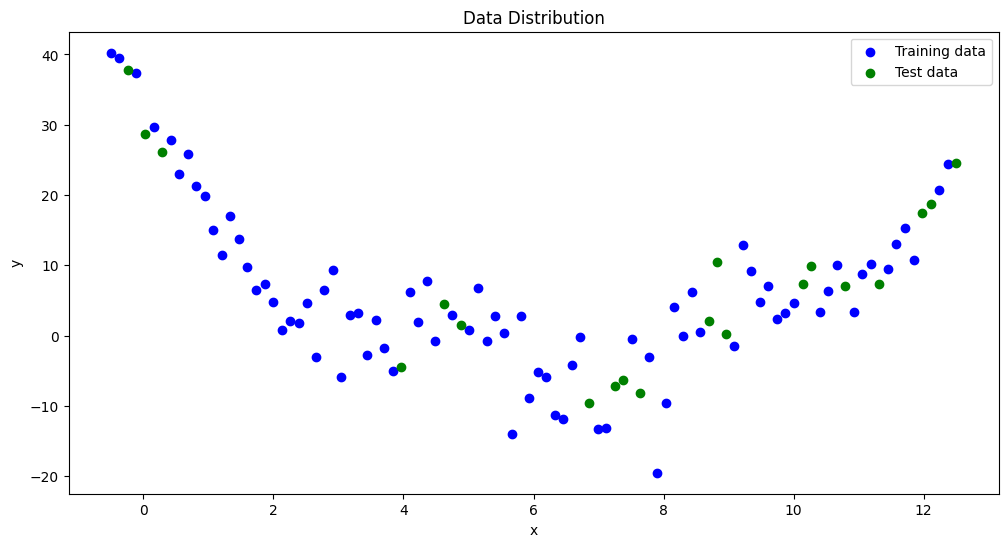

In [5]:
plt.figure(figsize=(12, 6))
plt.scatter(X_train, y_train, color="blue", label="Training data")
plt.scatter(X_test, y_test, color="green", label="Test data")
plt.title('Data Distribution')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

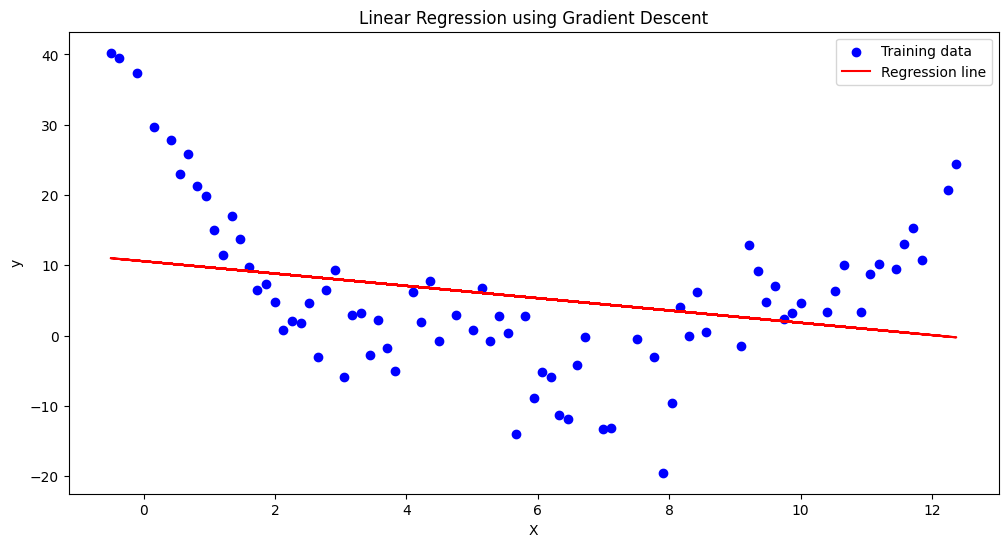

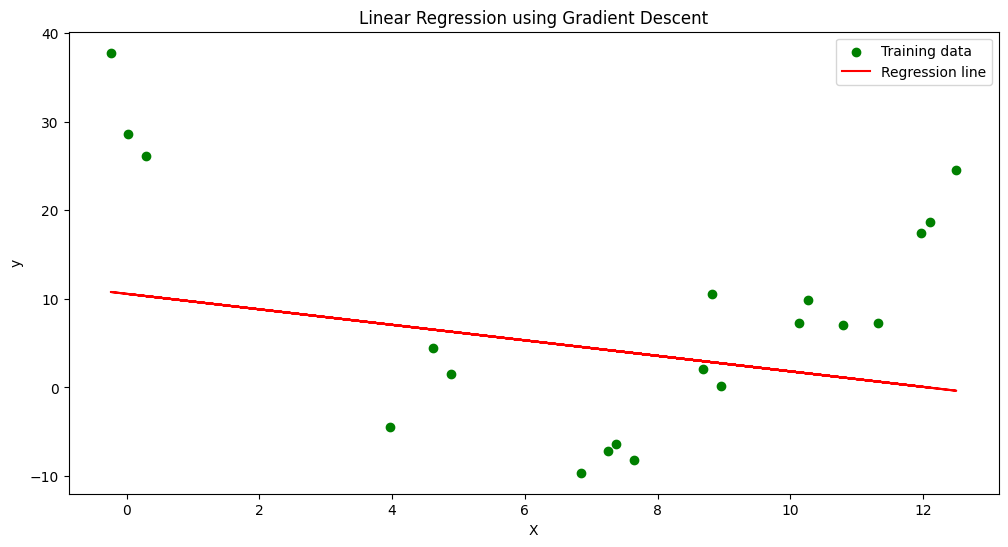

In [6]:
# Add a bias term (intercept) to the input features
X_train_bias = np.vstack([np.ones(X_train.shape[0]), X_train]).T
X_test_bias = np.vstack([np.ones(X_test.shape[0]), X_test]).T

# Parameters for Gradient Descent
learning_rate = 0.01  # Choose an appropriate learning rate
n_iterations = 1000    # Number of iterations
m = X_train_bias.shape[0]  # Number of training examples

# Initialize weights (beta)
beta = np.zeros(X_train_bias.shape[1])

# Gradient Descent
for iteration in range(n_iterations):
    predictions = X_train_bias @ beta  # Predicted values
    errors = predictions - y_train       # Errors
    gradients = (1/m) * (X_train_bias.T @ errors)  # Compute gradients
    beta -= learning_rate * gradients   # Update beta

# Make predictions for training and test sets
y_train_pred = X_train_bias @ beta

# Plotting the data and regression line
plt.figure(figsize=(12, 6))
plt.scatter(X_train, y_train, color="blue", label="Training data")
plt.plot(X_train, X_train * beta[1] + beta[0], color="red", label="Regression line")

# Labels and title
plt.title("Linear Regression using Gradient Descent")
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, color="green", label="Training data")
plt.plot(X_test, X_test * beta[1] + beta[0], color="red", label="Regression line")

# Labels and title
plt.title("Linear Regression using Gradient Descent")
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

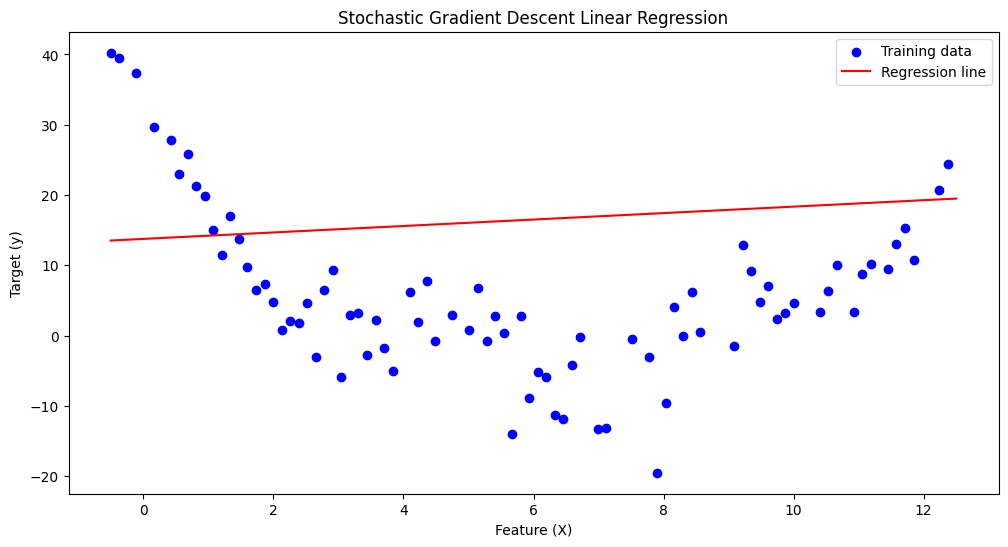

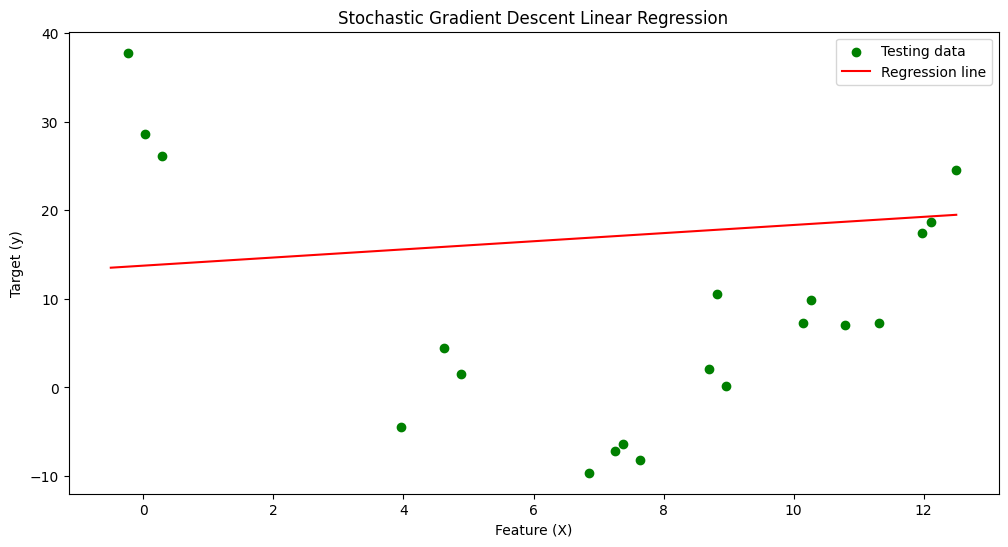

Training MSE: 262.4346350353591
Testing MSE: 264.92611068746453


In [7]:
beta = np.zeros(2)  # [beta_0 (intercept), beta_1 (slope)]
learning_rate = 0.01
num_iterations = 100
batch_size = 1

# Add bias term to training data
X_train_bias = np.vstack([np.ones(X_train.shape[0]), X_train]).T

# SGD loop
for _ in range(num_iterations):
    for i in range(len(X_train)):
        x_i = X_train_bias[i, :]  # One training sample (with bias term)
        y_i = y_train[i]          # Corresponding target

        # Prediction
        y_pred_i = np.dot(x_i, beta)

        # Gradient calculation
        gradient = -2 * (y_i - y_pred_i) * x_i

        # Update coefficients
        beta -= learning_rate * gradient


# Plotting the results
plt.figure(figsize=(12, 6))
plt.scatter(X_train, y_train, color="blue", label="Training data")
plt.plot(X, beta[0] + beta[1] * X, color="red", label="Regression line")

# Labels and title
plt.title("Stochastic Gradient Descent Linear Regression")
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, color="green", label="Testing data")
plt.plot(X, beta[0] + beta[1] * X, color="red", label="Regression line")

# Labels and title
plt.title("Stochastic Gradient Descent Linear Regression")
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.legend()
plt.show()


y_train_pred = X_train_bias @ beta

# Compute training error (MSE)
train_mse = np.mean((y_train - y_train_pred) ** 2)

# Compute test predictions
y_test_pred = X_test_bias @ beta

# Compute testing error (MSE)
test_mse = np.mean((y_test - y_test_pred) ** 2)

# Display the errors
print("Training MSE:", train_mse)
print("Testing MSE:", test_mse)

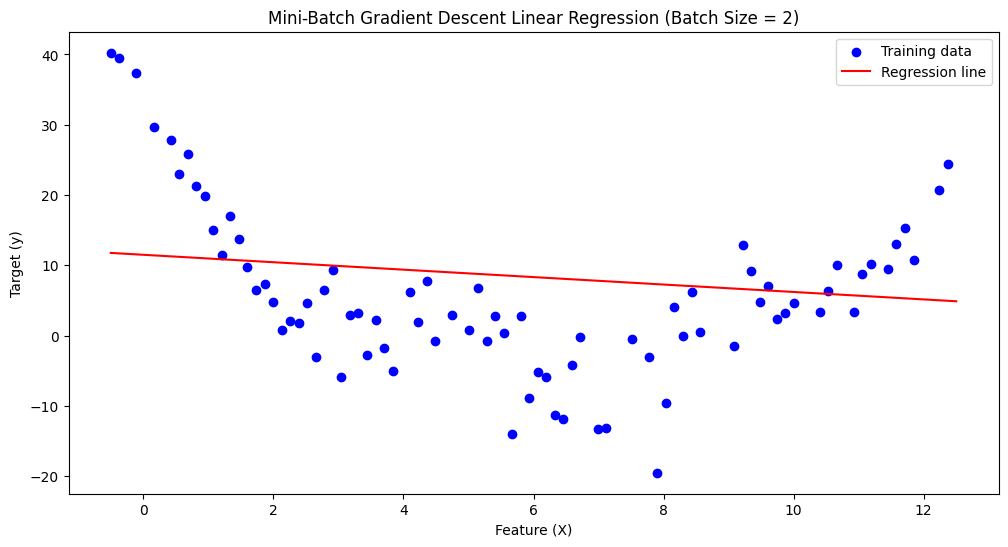

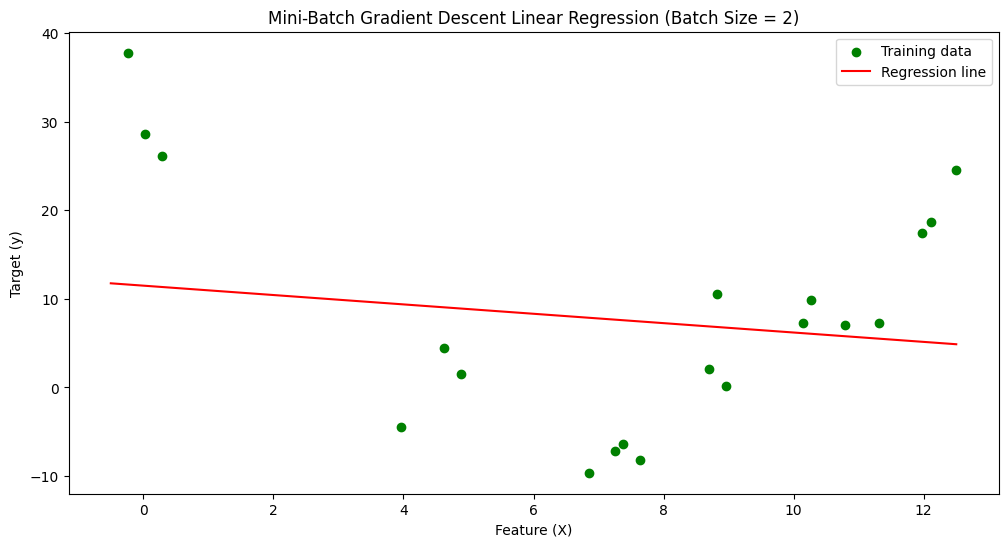

Training MSE: 134.1168143960399
Testing MSE: 162.7815683619437


In [8]:
beta = np.zeros(2)  # [beta_0 (intercept), beta_1 (slope)]
learning_rate = 0.01
num_iterations = 100
batch_size = 2  # Number of training samples per batch

# Add bias term to training data
X_train_bias = np.vstack([np.ones(X_train.shape[0]), X_train]).T

# Mini-Batch Gradient Descent loop
for _ in range(num_iterations):
    # Shuffle the training data
    indices = np.random.permutation(len(X_train))
    X_train_shuffled = X_train_bias[indices]
    y_train_shuffled = y_train[indices]

    # Process in mini-batches of size 2
    for start in range(0, len(X_train), batch_size):
        end = start + batch_size
        X_batch = X_train_shuffled[start:end]
        y_batch = y_train_shuffled[start:end]

        # Prediction for the batch
        y_pred_batch = X_batch @ beta

        # Gradient calculation for the batch
        gradient = -2 * X_batch.T @ (y_batch - y_pred_batch) / batch_size

        # Update coefficients
        beta -= learning_rate * gradient

# Compute training and testing errors
y_train_pred = X_train_bias @ beta
train_mse = np.mean((y_train - y_train_pred) ** 2)

X_test_bias = np.vstack([np.ones(X_test.shape[0]), X_test]).T
y_test_pred = X_test_bias @ beta
test_mse = np.mean((y_test - y_test_pred) ** 2)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.scatter(X_train, y_train, color="blue", label="Training data")
plt.plot(X, beta[0] + beta[1] * X, color="red", label="Regression line")

# Labels and title
plt.title("Mini-Batch Gradient Descent Linear Regression (Batch Size = 2)")
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.legend()
plt.show()


plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, color="green", label="Training data")
plt.plot(X, beta[0] + beta[1] * X, color="red", label="Regression line")

# Labels and title
plt.title("Mini-Batch Gradient Descent Linear Regression (Batch Size = 2)")
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.legend()
plt.show()

# Display the results
print("Training MSE:", train_mse)
print("Testing MSE:", test_mse)

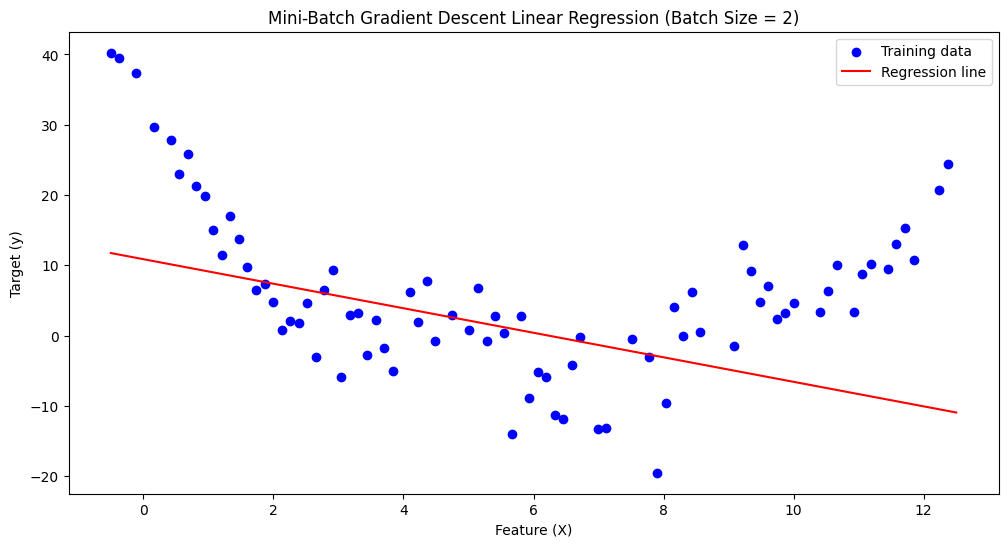

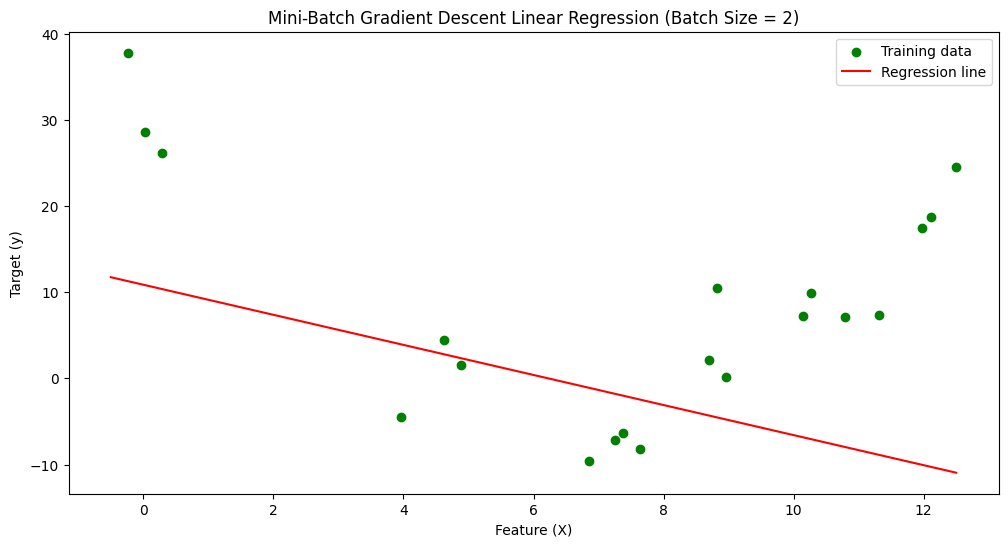

Training MSE: 155.92138941968398
Testing MSE: 280.8435908496625


In [9]:
beta = np.zeros(2)  # [beta_0 (intercept), beta_1 (slope)]
learning_rate = 0.01
num_iterations = 100
batch_size = 10  # Number of training samples per batch

# Add bias term to training data
X_train_bias = np.vstack([np.ones(X_train.shape[0]), X_train]).T

# Mini-Batch Gradient Descent loop
for _ in range(num_iterations):
    # Shuffle the training data
    indices = np.random.permutation(len(X_train))
    X_train_shuffled = X_train_bias[indices]
    y_train_shuffled = y_train[indices]

    # Process in mini-batches of size 2
    for start in range(0, len(X_train), batch_size):
        end = start + batch_size
        X_batch = X_train_shuffled[start:end]
        y_batch = y_train_shuffled[start:end]

        # Prediction for the batch
        y_pred_batch = X_batch @ beta

        # Gradient calculation for the batch
        gradient = -2 * X_batch.T @ (y_batch - y_pred_batch) / batch_size

        # Update coefficients
        beta -= learning_rate * gradient

# Compute training and testing errors
y_train_pred = X_train_bias @ beta
train_mse = np.mean((y_train - y_train_pred) ** 2)

X_test_bias = np.vstack([np.ones(X_test.shape[0]), X_test]).T
y_test_pred = X_test_bias @ beta
test_mse = np.mean((y_test - y_test_pred) ** 2)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.scatter(X_train, y_train, color="blue", label="Training data")
plt.plot(X, beta[0] + beta[1] * X, color="red", label="Regression line")

plt.title("Mini-Batch Gradient Descent Linear Regression (Batch Size = 2)")
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.legend()
plt.show()


plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, color="green", label="Training data")
plt.plot(X, beta[0] + beta[1] * X, color="red", label="Regression line")

plt.title("Mini-Batch Gradient Descent Linear Regression (Batch Size = 2)")
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.legend()
plt.show()


# Display the results
print("Training MSE:", train_mse)
print("Testing MSE:", test_mse)

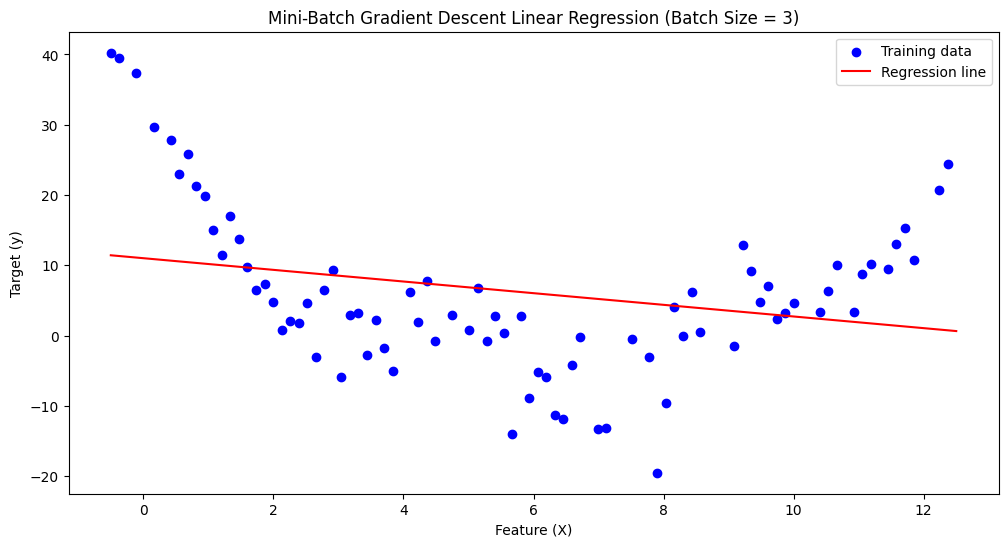

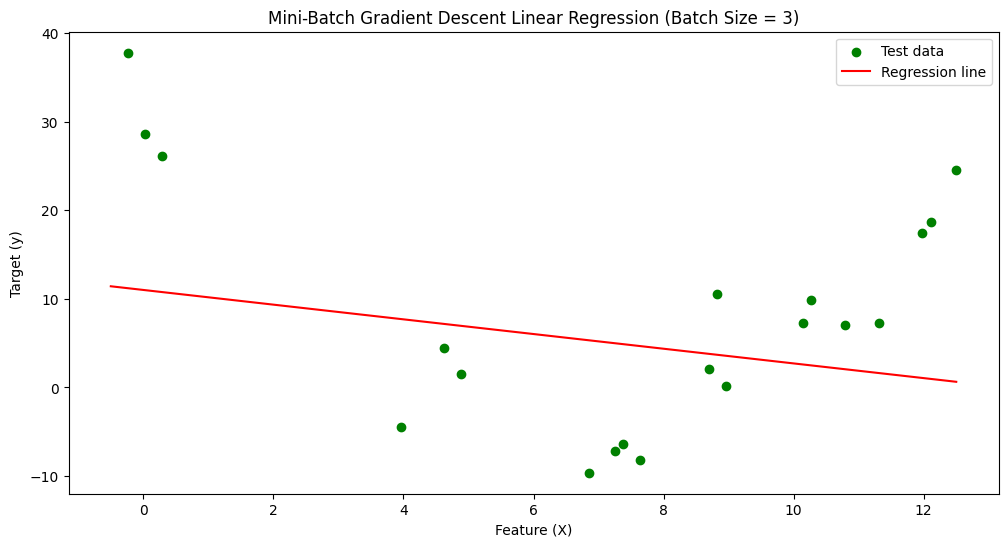

Training MSE: 124.8853894400825
Testing MSE: 172.64865247325548


In [10]:
beta = np.zeros(2)  # [beta_0 (intercept), beta_1 (slope)]
learning_rate = 0.01
num_iterations = 100


# Add bias term to training data
X_train_bias = np.vstack([np.ones(X_train.shape[0]), X_train]).T

# Mini-Batch Gradient Descent loop
for _ in range(num_iterations):
    # Shuffle the training data
    indices = np.random.permutation(len(X_train))
    X_train_shuffled = X_train_bias[indices]
    y_train_shuffled = y_train[indices]

    # Process in mini-batches of size 3
    for start in range(0, len(X_train), batch_size):
        end = start + batch_size
        X_batch = X_train_shuffled[start:end]
        y_batch = y_train_shuffled[start:end]

        # Prediction for the batch
        y_pred_batch = X_batch @ beta

        # Gradient calculation for the batch
        gradient = -2 * X_batch.T @ (y_batch - y_pred_batch) / batch_size

        # Update coefficients
        beta -= learning_rate * gradient

# Compute training and testing errors
y_train_pred = X_train_bias @ beta
train_mse = np.mean((y_train - y_train_pred) ** 2)

X_test_bias = np.vstack([np.ones(X_test.shape[0]), X_test]).T
y_test_pred = X_test_bias @ beta
test_mse = np.mean((y_test - y_test_pred) ** 2)


# Plotting the results
plt.figure(figsize=(12, 6))
plt.scatter(X_train, y_train, color="blue", label="Training data")
plt.plot(X, beta[0] + beta[1] * X, color="red", label="Regression line")

plt.title("Mini-Batch Gradient Descent Linear Regression (Batch Size = 3)")
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.legend()
plt.show()


plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, color="green", label="Test data")
plt.plot(X, beta[0] + beta[1] * X, color="red", label="Regression line")

plt.title("Mini-Batch Gradient Descent Linear Regression (Batch Size = 3)")
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.legend()
plt.show()

# Display the results
print("Training MSE:", train_mse)
print("Testing MSE:", test_mse)

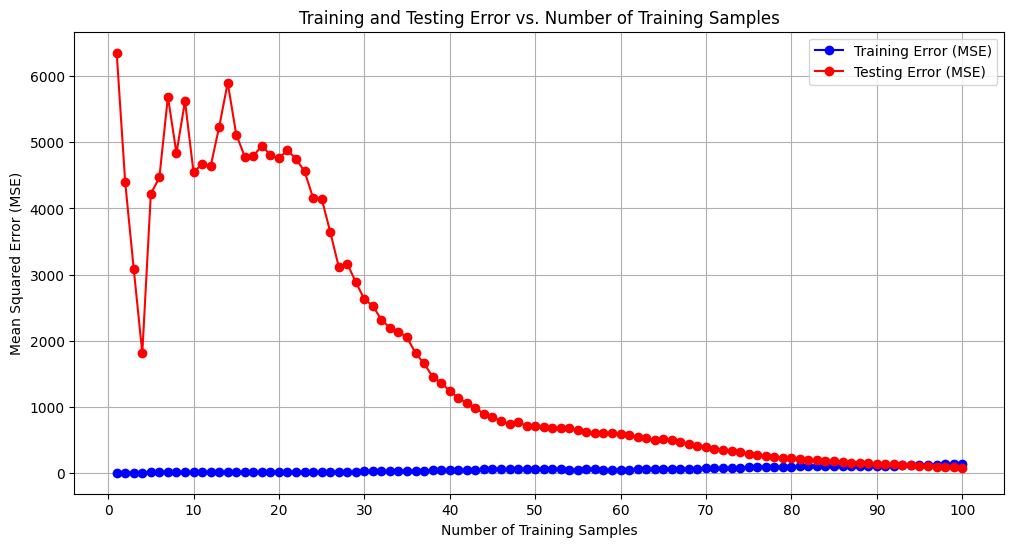

In [11]:
def compute_errors(batch_size, X_train, y_train, X_test, y_test):
    # Add bias term to training and testing data
    X_train_bias = np.vstack([np.ones(X_train.shape[0]), X_train.T]).T
    X_test_bias = np.vstack([np.ones(X_test.shape[0]), X_test.T]).T

    # Initialize coefficients
    beta = np.zeros(2)
    learning_rate = 0.01
    num_iterations = 1000

    # Batch Gradient Descent
    for _ in range(num_iterations):
        y_pred = X_train_bias @ beta
        gradient = -2 * X_train_bias.T @ (y_train - y_pred) / len(y_train)
        beta -= learning_rate * gradient

    # Calculate predictions and Mean Squared Error for the training and test sets
    y_train_pred = X_train_bias @ beta
    y_test_pred = X_test_bias @ beta
    train_mse = np.mean((y_train - y_train_pred) ** 2)
    test_mse = np.mean((y_test - y_test_pred) ** 2)

    return train_mse, test_mse

# Testing data (fixed size)
X_test1 = np.random.rand(30, 1) * 10  # 30 random test inputs between 0 and 10
y_test1 = 2 * X_test1.squeeze() + 1 + np.random.randn(30) * 2  # Corresponding noisy outputs

# Store mean squared errors for different training sizes
train_sizes = range(1, 101, 1)  # Training sizes from 5 to 100
train_errors = []
test_errors = []

# Compute errors for each training size
for size in train_sizes:
    X_train = X[:size]  # Select the first 'size' examples from X
    y_train = data[:size]  # Select the first 'size' examples from y
    train_mse, test_mse = compute_errors(size, X_train, y_train, X_test1, y_test1)
    train_errors.append(train_mse)
    test_errors.append(test_mse)

# Plotting the training and testing errors against training sizes
plt.figure(figsize=(12, 6))
plt.plot(train_sizes, train_errors, marker='o', linestyle='-', color='blue', label='Training Error (MSE)')
plt.plot(train_sizes, test_errors, marker='o', linestyle='-', color='red', label='Testing Error (MSE)')
plt.title('Training and Testing Error vs. Number of Training Samples')
plt.xlabel('Number of Training Samples')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.grid()
plt.xticks(np.arange(0, 110, 10))
plt.show()

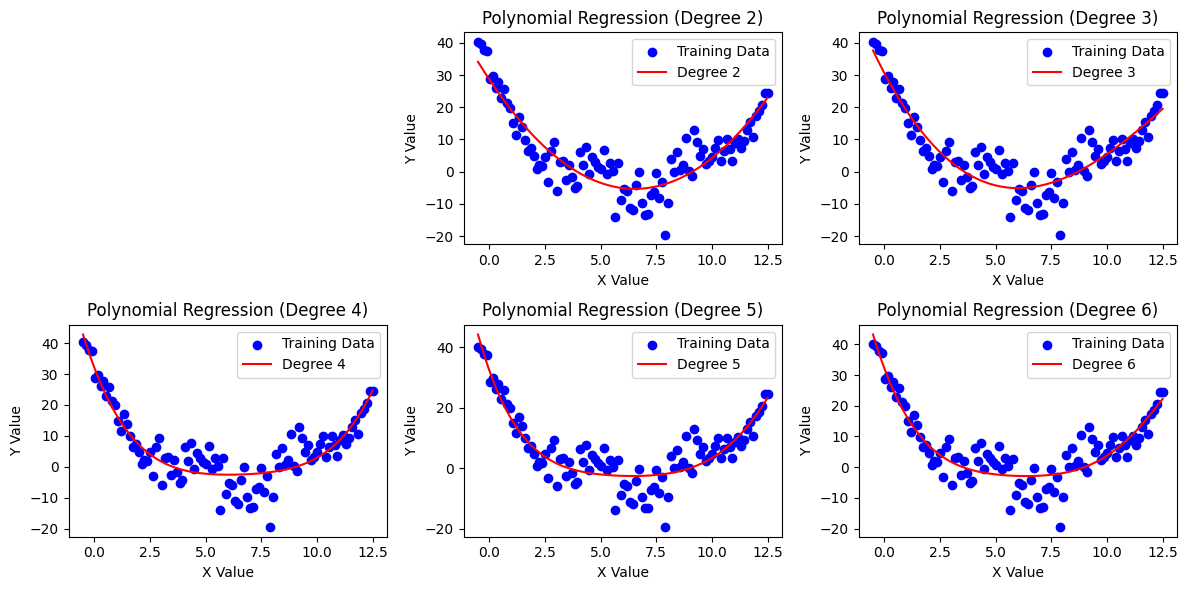

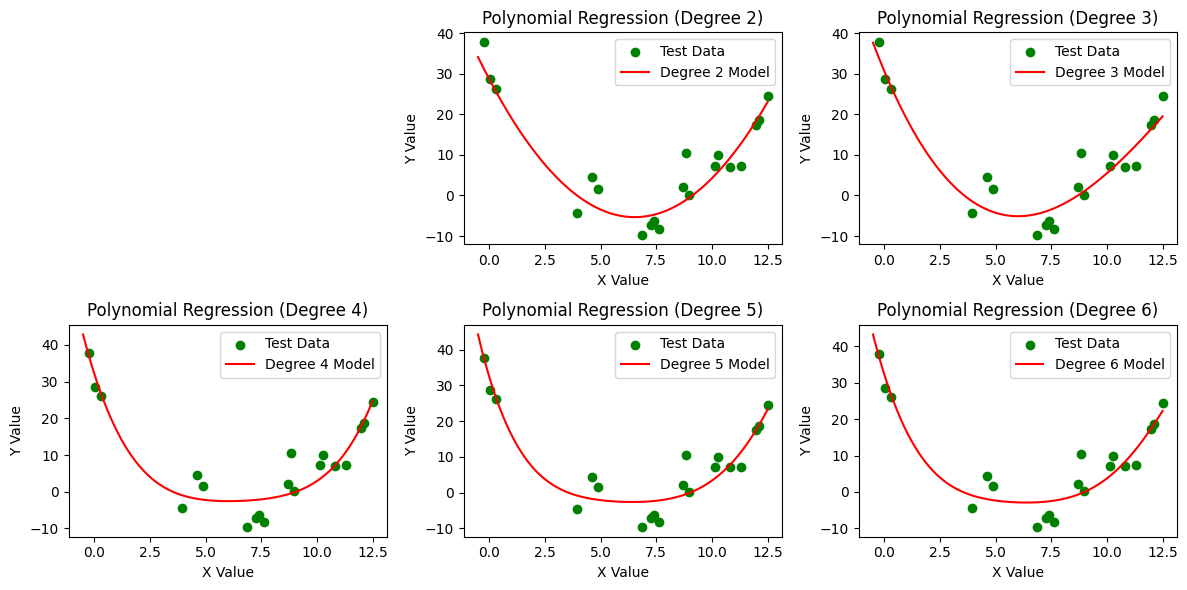

Mean Absolute Error (Testing): 3.4707857740914227
Mean Squared Error (Testing): 19.120750307000797
R-squared (Testing): 0.8889819985652494
Mean Absolute Error (Training): 4.245815145808526
Mean Squared Error (Training): 28.432616834239802
R-squared (Training): 0.8036301066281986


In [29]:
scaler = StandardScaler()
train_x_scaled = scaler.fit_transform(X_train.reshape(-1, 1))
test_x_scaled = scaler.transform(X_test.reshape(-1, 1))

# Polynomial Features
degree = 2
poly = PolynomialFeatures(degree)
train_x_poly = poly.fit_transform(train_x_scaled)
test_x_poly = poly.transform(test_x_scaled)

# Linear Regression Function
def linear_regression(x, y, learning_rate=0.001, iterations=5000):
    m = len(y)
    x = np.c_[np.ones((m, 1)), x]  # Add bias term
    beta = np.zeros(x.shape[1])    # Initialize coefficients

    for _ in range(iterations):
        predictions = x.dot(beta)
        error = predictions - y
        gradient = (2/m) * x.T.dot(error)
        beta -= learning_rate * gradient

    return beta

# Fit the Model
beta = linear_regression(train_x_poly, y_train)

# Prediction Function
def predict(x, beta):
    m = len(x)
    x = np.c_[np.ones((m, 1)), x]
    return x.dot(beta)

# Predictions
train_predictions = predict(train_x_poly, beta)
test_predictions = predict(test_x_poly, beta)

x_range = np.linspace(X_train.min(), X_train.max(), 500).reshape(-1, 1)
x_range_scaled = scaler.transform(x_range)
x_range_poly = poly.transform(x_range_scaled)
y_range_predictions = predict(x_range_poly, beta)

degrees = range(2, 7)
plt.figure(figsize=(12, 6))

for degree in degrees:

    poly = PolynomialFeatures(degree=degree)
    train_x_poly = poly.fit_transform(train_x_scaled)
    test_x_poly = poly.transform(test_x_scaled)


    beta = linear_regression(train_x_poly, y_train)


    x_range = np.linspace(X_train.min(), X_train.max(), 500).reshape(-1, 1)
    x_range_scaled = scaler.transform(x_range)
    x_range_poly = poly.transform(x_range_scaled)
    y_range_predictions = predict(x_range_poly, beta)


    plt.subplot(2, 3, degree)
    plt.scatter(X_train, y_train, color='blue', label='Training Data')
    plt.plot(x_range, y_range_predictions, color='red', label=f'Degree {degree}')
    plt.title(f"Polynomial Regression (Degree {degree})")
    plt.xlabel("X Value")
    plt.ylabel("Y Value")
    plt.legend()

plt.tight_layout()
plt.show()

degrees = range(2, 7)
plt.figure(figsize=(12, 6))

for degree in degrees:

    poly = PolynomialFeatures(degree=degree)
    train_x_poly = poly.fit_transform(train_x_scaled)
    test_x_poly = poly.transform(test_x_scaled)


    beta = linear_regression(train_x_poly, y_train)


    test_predictions = predict(test_x_poly, beta)

    x_range = np.linspace(X_train.min(), X_train.max(), 500).reshape(-1, 1)
    x_range_scaled = scaler.transform(x_range)
    x_range_poly = poly.transform(x_range_scaled)
    y_range_predictions = predict(x_range_poly, beta)


    plt.subplot(2, 3, degree)
    plt.scatter(X_test, y_test, color='green', label='Test Data')
    plt.plot(x_range, y_range_predictions, color='red', label=f'Degree {degree} Model')
    plt.title(f"Polynomial Regression (Degree {degree})")
    plt.xlabel("X Value")
    plt.ylabel("Y Value")
    plt.legend()

plt.tight_layout()
plt.show()
# Evaluation Metrics
print(f"Mean Absolute Error (Testing): {mean_absolute_error(y_test, test_predictions)}")
print(f"Mean Squared Error (Testing): {mean_squared_error(y_test, test_predictions)}")
print(f"R-squared (Testing): {r2_score(y_test, test_predictions)}")
print(f"Mean Absolute Error (Training): {mean_absolute_error(y_train, train_predictions)}")
print(f"Mean Squared Error (Training): {mean_squared_error(y_train, train_predictions)}")
print(f"R-squared (Training): {r2_score(y_train, train_predictions)}")

<ipython-input-12-d9d6ec8ad7c9>:38: RuntimeWarning: overflow encountered in matmul
  gradient = -2 * X_batch.T @ (y_batch - y_pred_batch) / batch_size
<ipython-input-12-d9d6ec8ad7c9>:41: RuntimeWarning: invalid value encountered in subtract
  beta -= learning_rate * gradient


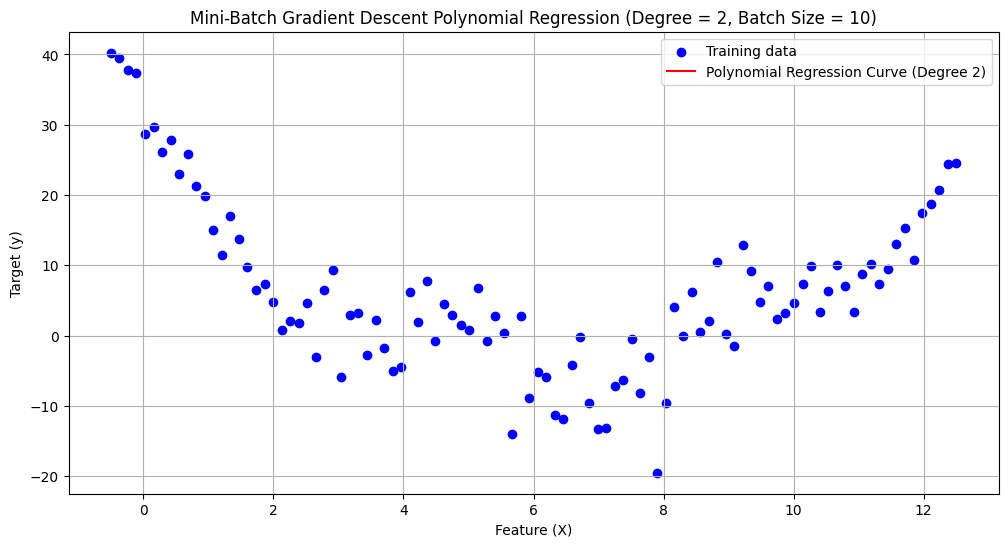

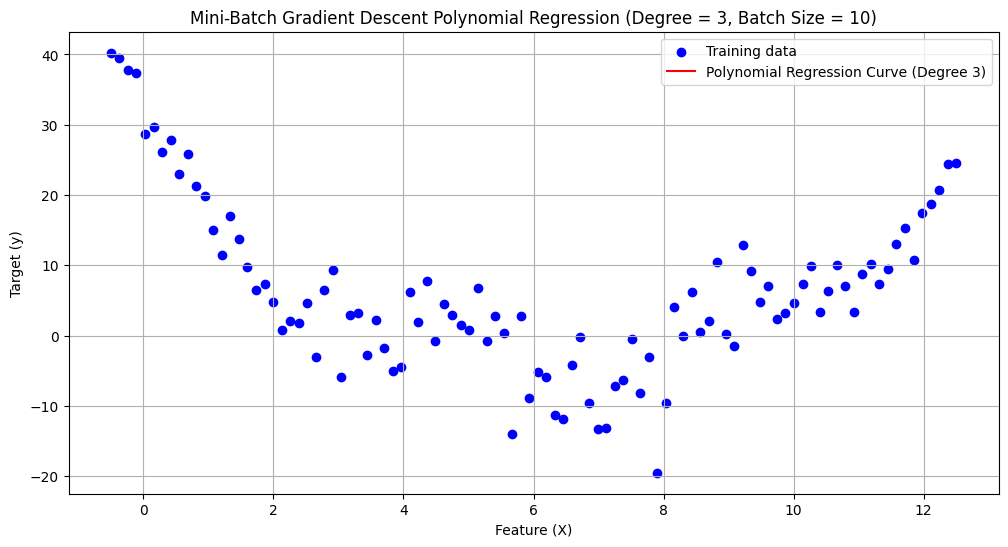

<ipython-input-12-d9d6ec8ad7c9>:35: RuntimeWarning: invalid value encountered in matmul
  y_pred_batch = X_batch @ beta


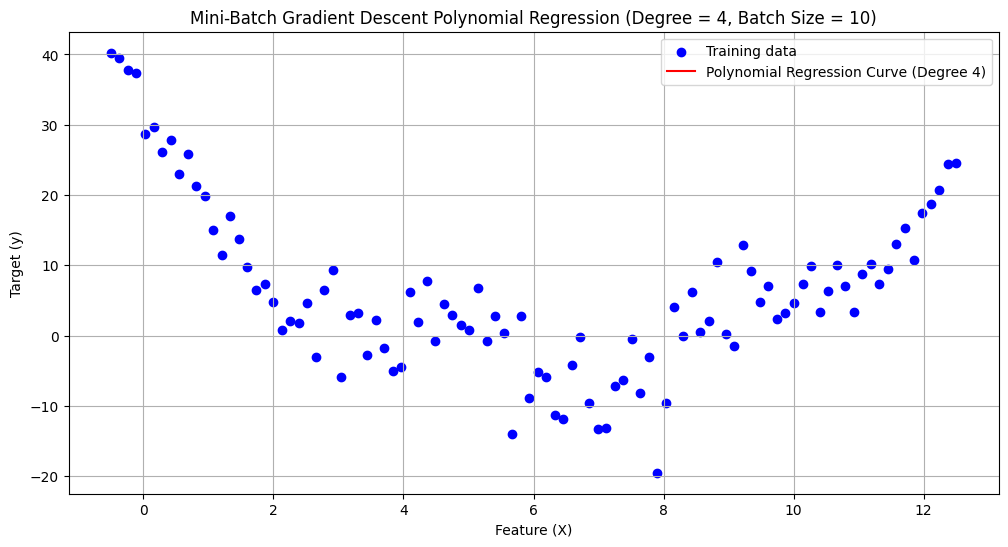

<ipython-input-12-d9d6ec8ad7c9>:35: RuntimeWarning: overflow encountered in matmul
  y_pred_batch = X_batch @ beta


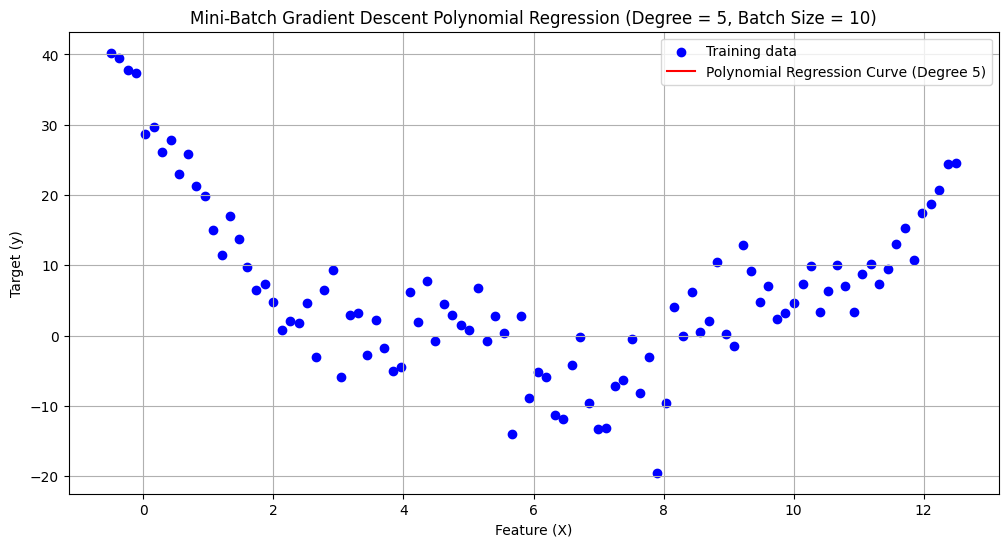

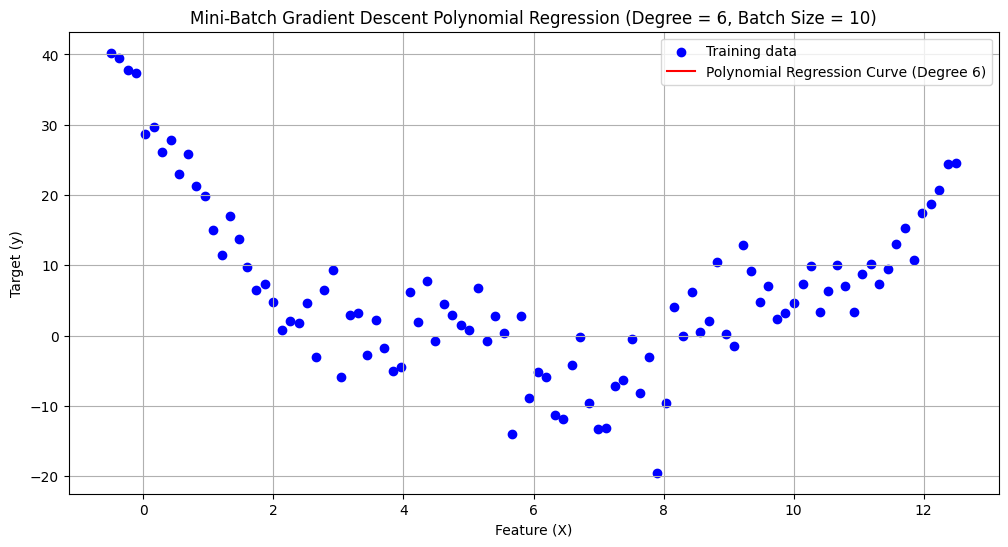

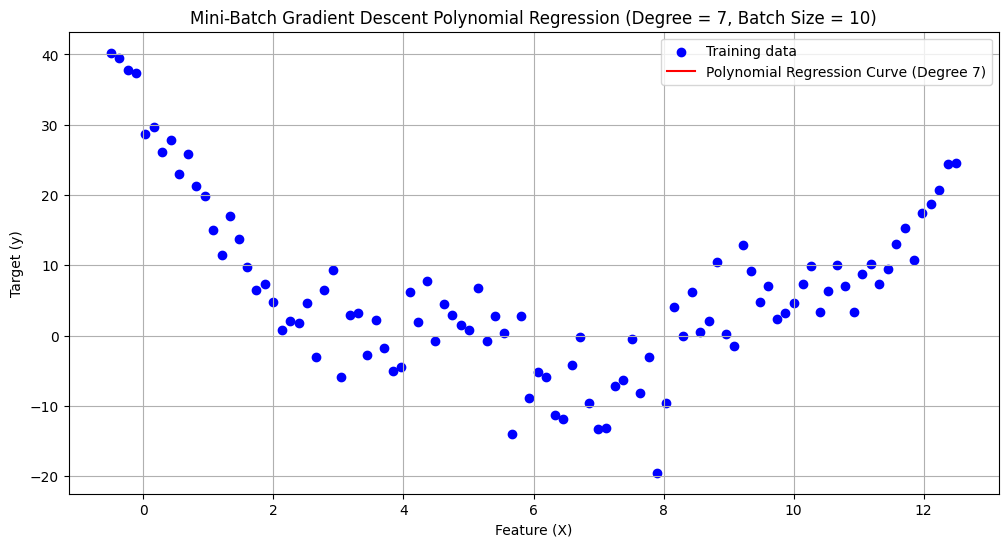

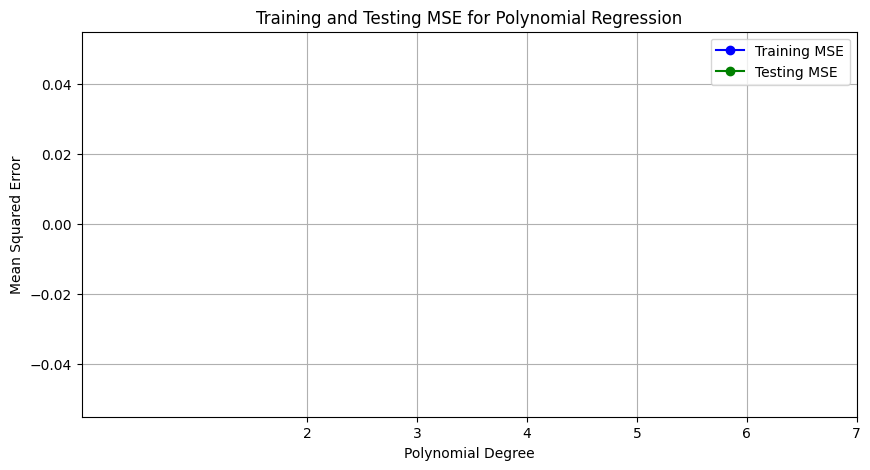

In [12]:
# Function to create polynomial features
def polynomial_features(X, degree):
    return np.column_stack([X ** d for d in range(degree + 1)])

# Define degrees to test
degrees = range(2, 8)  # Testing degrees from 2 to 7
train_mses = []
test_mses = []

# Loop through each degree and perform polynomial regression
for degree in degrees:
    # Transform training and testing data into polynomial features
    X_train_poly = polynomial_features(X_train, degree)
    X_test_poly = polynomial_features(X_test, degree)

    # Initialize beta coefficients
    beta = np.zeros(degree + 1)
    learning_rate = 0.01
    num_iterations = 100

    # Mini-Batch Gradient Descent loop
    for _ in range(num_iterations):
        # Shuffle the training data
        indices = np.random.permutation(len(X_train_poly))
        X_train_shuffled = X_train_poly[indices]
        y_train_shuffled = y_train[indices]

        # Process in mini-batches
        for start in range(0, len(X_train_poly), batch_size):
            end = start + batch_size
            X_batch = X_train_shuffled[start:end]
            y_batch = y_train_shuffled[start:end]

            # Prediction for the batch
            y_pred_batch = X_batch @ beta

            # Gradient calculation for the batch
            gradient = -2 * X_batch.T @ (y_batch - y_pred_batch) / batch_size

            # Update coefficients
            beta -= learning_rate * gradient

    # Compute training and testing errors
    y_train_pred = X_train_poly @ beta
    train_mse = np.mean((y_train - y_train_pred) ** 2)
    train_mses.append(train_mse)

    y_test_pred = X_test_poly @ beta
    test_mse = np.mean((y_test - y_test_pred) ** 2)
    test_mses.append(test_mse)

    # Plotting the results for each degree
    plt.figure(figsize=(12, 6))
    plt.scatter(X_train, y_train, color="blue", label="Training data")

    # For plotting: create a smooth line for the polynomial fit
    X_plot = np.linspace(X_train.min(), X_train.max(), 500)
    X_plot_poly = polynomial_features(X_plot, degree)
    y_plot = X_plot_poly @ beta

    plt.plot(X_plot, y_plot, color="red", label=f"Polynomial Regression Curve (Degree {degree})")

    plt.title(f"Mini-Batch Gradient Descent Polynomial Regression (Degree = {degree}, Batch Size = {batch_size})")
    plt.xlabel("Feature (X)")
    plt.ylabel("Target (y)")
    plt.legend()
    plt.grid()  # Optional: Add grid for clarity
    plt.show()  # Ensure this is called to display the plot

# Plot Training and Testing MSEs by degree
plt.figure(figsize=(10, 5))
plt.plot(degrees, train_mses, marker='o', label='Training MSE', color='blue')
plt.plot(degrees, test_mses, marker='o', label='Testing MSE', color='green')
plt.title("Training and Testing MSE for Polynomial Regression")
plt.xlabel("Polynomial Degree")
plt.ylabel("Mean Squared Error")
plt.xticks(degrees)
plt.legend()
plt.grid()
plt.show()

In [13]:





scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape(-1, 1))
X_test_scaled = scaler.transform(X_test.reshape(-1, 1))

# Polynomial Features
degree = 3  # Set this to the desired degree
poly = PolynomialFeatures(degree)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_train_scaled)

# Linear Regression Function
def linear_regression(x, y, learning_rate=0.001, iterations=5000):
    m = len(y)
    x = np.c_[np.ones((m, 1)), x]  # Add bias term
    beta = np.zeros(x.shape[1])    # Initialize coefficients

    for _ in range(iterations):
        predictions = x.dot(beta)
        error = predictions - y
        gradient = (2/m) * x.T.dot(error)
        beta -= learning_rate * gradient

    return beta

# Fit the Model
beta = linear_regression(X_train_poly, y_train)

# Prediction Function
def predict(x, beta):
    m = len(x)
    x = np.c_[np.ones((m, 1)), x]
    return x.dot(beta)

# Predictions
train_predictions = predict(X_train_poly, beta)
test_predictions = predict(X_test_poly, beta)

x_range = np.linspace(X_train.min(), X_train.max(), 500).reshape(-1, 1)
x_range_scaled = scaler.transform(x_range)
x_range_poly = poly.transform(x_range_scaled)
y_range_predictions = predict(x_range_poly, beta)

degrees = range(2, 9)
plt.figure(figsize=(15, 10))

for degree in degrees:

    poly = PolynomialFeatures(degree=degree)
    train_x_poly = poly.fit_transform(X_train_scaled)
    test_x_poly = poly.transform(X_test_scaled)


    beta = linear_regression(X_train_poly, y_train)


    x_range = np.linspace(X_train.min(), X_train.max(), 500).reshape(-1, 1)
    x_range_scaled = scaler.transform(x_range)
    x_range_poly = poly.transform(x_range_scaled)
    y_range_predictions = predict(x_range_poly, beta)


    plt.subplot(3, 3, degree - 1)
    plt.scatter(X_train, y_train, color='blue', label='Training Data')
    plt.plot(x_range, y_range_predictions, color='green', label=f'Degree {degree}')
    plt.title(f"Polynomial Regression (Degree {degree})")
    plt.xlabel("X Value")
    plt.ylabel("Y Value")
    plt.legend()

plt.tight_layout()
plt.show()

degrees = range(2, 9)
plt.figure(figsize=(15, 10))

for degree in degrees:

    poly = PolynomialFeatures(degree=degree)
    train_x_poly = poly.fit_transform(X_train_scaled)
    test_x_poly = poly.transform(X_test_scaled)


    beta = linear_regression(X_train_poly, y_train)


    test_predictions = predict(test_x_poly, beta)

    x_range = np.linspace(X_train.min(), X_train.max(), 500).reshape(-1, 1)
    x_range_scaled = scaler.transform(x_range)
    x_range_poly = poly.transform(x_range_scaled)
    y_range_predictions = predict(x_range_poly, beta)


    plt.subplot(3, 3, degree - 1)
    plt.scatter(X_test, y_train, color='red', label='Test Data')  # داده‌های تست
    plt.plot(x_range, y_range_predictions, color='green', label=f'Degree {degree} Model')  # مدل
    plt.title(f"Polynomial Regression (Degree {degree})")
    plt.xlabel("X Value")
    plt.ylabel("Y Value")
    plt.legend()

plt.tight_layout()
plt.show()
# Evaluation Metrics
print(f"Mean Absolute Error (Testing): {mean_absolute_error(y_test, test_predictions)}")
print(f"Mean Squared Error (Testing): {mean_squared_error(y_test, test_predictions)}")
print(f"R-squared (Testing): {r2_score(y_test, test_predictions)}")
print(f"Mean Absolute Error (Training): {mean_absolute_error(y_train, train_predictions)}")
print(f"Mean Squared Error (Training): {mean_squared_error(y_train, train_predictions)}")
print(f"R-squared (Training): {r2_score(y_train, train_predictions)}")

ValueError: shapes (500,4) and (5,) not aligned: 4 (dim 1) != 5 (dim 0)

<Figure size 1500x1000 with 0 Axes>

In [ ]:
model = LinearRegression()

X_train=X_train.reshape(-1,1)
y_train=y_train.reshape(-1,1)
X_test=X_test.reshape(-1,1)
y_test=y_test.reshape(-1,1)
# Fit the model on training data
model.fit(X_train, y_train)

# Predict for both training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Plot the training and testing data
plt.figure(figsize=(12, 6))
plt.scatter(X_train, y_train, color='blue', label='Training Data', alpha=0.7)

# Plot the regression curve
X_plot = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
y_plot = model.predict(X_plot)
plt.plot(X_plot, y_plot, color='red', label='line')
# Add labels and legend
plt.title(' Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, color='green', label='Testing Data', alpha=0.7)

# Plot the regression curve
X_plot = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
y_plot = model.predict(X_plot)
plt.plot(X_plot, y_plot, color='red', label='line')
plt.title(' LinearRegression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

# Calculate errors for training and testing data
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print errors
print("Training Data Errors:")
print(f"  MSE: {train_mse:.2f}")
print(f"  MAE: {train_mae:.2f}")
print(f"  R-squared (R²): {train_r2:.2f}")

print("Testing Data Errors:")
print(f"  MSE: {test_mse:.2f}")
print(f"  MAE: {test_mae:.2f}")
print(f"  R-squared (R²): {test_r2:.2f}")

In [ ]:
model = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
X_train=X_train.reshape(-1,1)
y_train=y_train.reshape(-1,1)
X_test=X_test.reshape(-1,1)
y_test=y_test.reshape(-1,1)
# Fit the model on training data
model.fit(X_train, y_train)

# Predict for both training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Plot the training and testing data
plt.figure(figsize=(12, 6))
plt.scatter(X_train, y_train, color='blue', label='Training Data', alpha=0.7)

# Plot the regression curve
X_plot = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
y_plot = model.predict(X_plot)
plt.plot(X_plot, y_plot, color='red', label='Regression Curve')
# Add labels and legend
plt.title('Polynomial Regression (degree=3)')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, color='green', label='Testing Data', alpha=0.7)

# Plot the regression curve
X_plot = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
y_plot = model.predict(X_plot)
plt.plot(X_plot, y_plot, color='red', label='Regression Curve')
plt.title('Polynomial Regression (degree=3)')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

# Calculate errors for training and testing data
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print errors
print("Training Data Errors:")
print(f"  MSE: {train_mse:.2f}")
print(f"  MAE: {train_mae:.2f}")
print(f"  R-squared (R²): {train_r2:.2f}")

print("Testing Data Errors:")
print(f"  MSE: {test_mse:.2f}")
print(f"  MAE: {test_mae:.2f}")
print(f"  R-squared (R²): {test_r2:.2f}")

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
X_train=X_train.reshape(-1,1)
y_train=y_train.reshape(-1,1)
X_test=X_test.reshape(-1,1)
y_test=y_test.reshape(-1,1)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Plot the training and testing data
plt.figure(figsize=(12, 6))
plt.scatter(X_train, y_train, color='blue', label='Training Data', alpha=0.7)

# Plot the regression curve
X_plot = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
y_plot = model.predict(X_plot)
plt.plot(X_plot, y_plot, color='red', label='Regression Curve')
# Add labels and legend
plt.title('RandomForestRegressor')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, color='green', label='Testing Data', alpha=0.7)

# Plot the regression curve
X_plot = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
y_plot = model.predict(X_plot)
plt.plot(X_plot, y_plot, color='red', label='Regression Curve')
plt.title('Random Forest Regressor')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

# Calculate errors for training and testing data
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print errors
print("Training Data Errors:")
print(f"  MSE: {train_mse:.2f}")
print(f"  MAE: {train_mae:.2f}")
print(f"  R-squared (R²): {train_r2:.2f}")

print("Testing Data Errors:")
print(f"  MSE: {test_mse:.2f}")
print(f"  MAE: {test_mae:.2f}")
print(f"  R-squared (R²): {test_r2:.2f}")